In [17]:
import torch
import os
from copy import deepcopy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torchmetrics.wrappers import MultioutputWrapper
import torchmetrics


from qtaim_embed.models.utils import load_graph_level_model_from_config
from qtaim_embed.data.dataloader import DataLoaderMoleculeGraphTask
from qtaim_embed.core.dataset import HeteroGraphGraphLabelDataset
from qtaim_embed.models.utils import get_test_train_preds_as_df, test_and_predict_libe, test_and_predict



In [18]:
model_root = "../../../../data/saved_models/final_set/qm9_intrinsic_big_small/no_qtaim/"
model_qtaim = "../../../../data/saved_models/final_set/qm9_intrinsic_big_small/qtaim/"
model_list = os.listdir(model_root)
model_log_list = os.listdir(model_qtaim)


In [19]:
feat_dict_large = {
    "atom": [
        "extra_feat_atom_Hamiltonian_K",
        "extra_feat_atom_e_density",
        "extra_feat_atom_lap_e_density",
        "extra_feat_atom_e_loc_func",
        "extra_feat_atom_ave_loc_ion_E",
        "extra_feat_atom_delta_g_promolecular",
        "extra_feat_atom_delta_g_hirsh",
        "extra_feat_atom_esp_nuc",
        "extra_feat_atom_esp_e",
        "extra_feat_atom_esp_total",
        "extra_feat_atom_grad_norm",
        "extra_feat_atom_lap_norm",
        "extra_feat_atom_eig_hess",
        "extra_feat_atom_det_hessian",
        "extra_feat_atom_ellip_e_dens",
        "extra_feat_atom_eta",
        "extra_feat_atom_energy_density",
    ],
    "bond": [
        "bond_length",
        "extra_feat_bond_Lagrangian_K",
        "extra_feat_bond_Hamiltonian_K",
        "extra_feat_bond_e_density",
        "extra_feat_bond_lap_e_density",
        "extra_feat_bond_e_loc_func",
        "extra_feat_bond_ave_loc_ion_E",
        "extra_feat_bond_delta_g_promolecular",
        "extra_feat_bond_delta_g_hirsh",
        "extra_feat_bond_esp_nuc",
        "extra_feat_bond_esp_e",
        "extra_feat_bond_esp_total",
        "extra_feat_bond_grad_norm",
        "extra_feat_bond_lap_norm",
        "extra_feat_bond_eig_hess",
        "extra_feat_bond_det_hessian",
        "extra_feat_bond_ellip_e_dens",
        "extra_feat_bond_eta",
        "extra_feat_bond_energy_density",
        "extra_feat_bond_lol",
    ],
    "global": ["homo", "lumo", "gap"],
}

feat_dict = {
    "atom": [],
    "bond": [
        "bond_length",
    ],
    "global": ["homo", "lumo", "gap"],
}


In [20]:
qm8_loc = "../../../../data/splits_1205/test_qm9_1205_large.pkl"
qm8_train_loc = "../../../../data/splits_1205/train_qm9_1205_small.pkl"

dataset_test_qtaim_small = HeteroGraphGraphLabelDataset(
    file=qm8_loc,
    allowed_ring_size=[3, 4, 5, 6, 7],
    allowed_charges=None,
    allowed_spins=None,
    self_loop=True,
    extra_keys=feat_dict,
    target_list=["homo", "lumo", "gap"],
    extra_dataset_info={},
    debug=False,
    log_scale_features=False,
    log_scale_targets=False,
    standard_scale_features=True,
    standard_scale_targets=True,
)
dataset_train_qtaim_small = HeteroGraphGraphLabelDataset(
    file=qm8_train_loc,
    allowed_ring_size=[3, 4, 5, 6, 7],
    allowed_charges=None,
    allowed_spins=None,
    self_loop=True,
    extra_keys=feat_dict,
    target_list=["homo", "lumo", "gap"],
    extra_dataset_info={},
    debug=False,
    log_scale_features=False,
    log_scale_targets=False,
    standard_scale_features=True,
    standard_scale_targets=True,
)

dataset_test_qtaim_large = HeteroGraphGraphLabelDataset(
    file=qm8_loc,
    allowed_ring_size=[3, 4, 5, 6, 7],
    allowed_charges=None,
    allowed_spins=None,
    self_loop=True,
    extra_keys=feat_dict_large,
    target_list=["homo", "lumo", "gap"],
    extra_dataset_info={},
    debug=False,
    log_scale_features=True,
    log_scale_targets=False,
    standard_scale_features=True,
    standard_scale_targets=True,
)
dataset_train_qtaim_large = HeteroGraphGraphLabelDataset(
    file=qm8_train_loc,
    allowed_ring_size=[3, 4, 5, 6, 7],
    allowed_charges=None,
    allowed_spins=None,
    self_loop=True,
    extra_keys=feat_dict_large,
    target_list=["homo", "lumo", "gap"],
    extra_dataset_info={},
    debug=False,
    log_scale_features=True,
    log_scale_targets=False,
    standard_scale_features=True,
    standard_scale_targets=True,
)
mean [-0.23935645  0.01311887  0.25247509]
mean [-0.26304014 -0.05658131  0.20645894]


... > creating MoleculeWrapper objects


100%|██████████| 12987/12987 [00:01<00:00, 10910.90it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['homo', 'lumo', 'gap']
... > Building graphs and featurizing


100%|██████████| 12987/12987 [00:27<00:00, 480.62it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 12987/12987 [00:00<00:00, 33588.86it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [1.46676494e+00 3.42004270e-01 6.24502279e-02 8.88273268e-03
 2.32764025e-02 2.17133465e-02 7.25613785e-03 1.32160830e-03
 5.14732544e-01 3.51259764e-01 1.15640726e-03 7.70429862e-02
 5.58082990e-02]
std [1.63105723 0.65684508 0.24197148 0.09382873 0.15078001 0.14574593
 0.08487335 0.0363299  0.49978291 0.47736395 0.03398632 0.26665964
 0.22955116]
mean [0.         0.08153041 0.01159881 0.03058415 0.02844249 0.0095992
 0.00191219 1.61601026]
std [0.         0.27364795 0.10707137 0.17218815 0.16623332 0.09750415
 0.04368679 0.80243423]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [ 18.17787018  14.09378609 123.13904464]
std [2.70908058 1.81766374 6.77714581]
... > Scaling features complete
... > feature mean(s): 
 {'atom': tensor([1.4668e+00, 3.4200e-01, 6.2450e-02, 8.8827e-03, 2.3276e-

100%|██████████| 3921/3921 [00:00<00:00, 14084.03it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['homo', 'lumo', 'gap']
... > Building graphs and featurizing


100%|██████████| 3921/3921 [00:06<00:00, 626.91it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 3921/3921 [00:00<00:00, 35612.53it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [1.72497559e+00 2.35543851e-01 1.46502599e-01 6.96982768e-03
 5.53045610e-02 6.18884374e-02 2.20673372e-02 2.72436261e-04
 2.85785638e-01 3.56210412e-01 2.23851795e-02 1.35786773e-01
 1.99831998e-01]
std [1.43463347 0.47531363 0.35360937 0.08319405 0.22857377 0.24095281
 0.14690259 0.01650339 0.45178779 0.47887843 0.1479327  0.342562
 0.39987394]
mean [0.00000000e+00 1.59866122e-01 7.60446916e-03 6.06388738e-02
 6.74312152e-02 2.40685141e-02 5.16808584e-04 1.43164565e+00]
std [0.         0.36648185 0.08687141 0.23866671 0.25076732 0.15326193
 0.02272755 0.7582925 ]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [ 11.23361387  10.36317266 111.923732  ]
std [ 1.08759551  1.54939434 16.14085919]
... > Scaling features complete
... > feature mean(s): 
 {'atom': tensor([1.7250e+00, 2.3554e-01

100%|██████████| 12987/12987 [00:04<00:00, 2624.43it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys ['extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density']
selected bond keys ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond_esp_e', 'extra_

100%|██████████| 12987/12987 [00:29<00:00, 433.43it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length', 'extra_feat_bond_Lagrangian_K', 'extra

100%|██████████| 12987/12987 [00:00<00:00, 33594.16it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 7.13835079e-01  2.11023459e-01  4.32871995e-02  6.15704113e-03
  1.61339728e-02  1.50505450e-02  5.02957151e-03  9.16069066e-04
  3.56785412e-01  2.43474716e-01  8.01560433e-04  5.34021288e-02
  3.86833652e-02  6.27044597e+00 -6.27044597e+00 -7.55224121e+00
  6.93045356e-01  1.39249289e+00  8.31798723e-02  1.42427249e-01
  8.51556124e+00 -3.06066578e+00  8.20619413e+00  0.00000000e+00
 -7.55224121e+00 -7.55224121e+00 -1.92440199e+01  6.53687488e-04
 -7.37212182e-01 -6.27044597e+00]
std [6.04332610e-01 3.73817062e-01 1.67721849e-01 6.50371168e-02
 1.04512740e-01 1.01023383e-01 5.88297266e-02 2.51819679e-02
 3.46423112e-01 3.30883478e-01 2.35575223e-02 1.84834379e-01
 1.59112736e-01 5.01078735e+00 5.01078735e+00 5.11184589e+00
 3.04981150e-04 1.07429538e+00 4.36810949e-02 8.9317084

100%|██████████| 3921/3921 [00:01<00:00, 3147.47it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys ['extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density']
selected bond keys ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'extra_feat_bond_delta_g_hirsh', 'extra_feat_bond_esp_nuc', 'extra_feat_bond_esp_e', 'extra_

100%|██████████| 3921/3921 [00:06<00:00, 592.95it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length', 'extra_feat_bond_Lagrangian_K', 'extra

100%|██████████| 3921/3921 [00:00<00:00, 32812.20it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 8.62412881e-01  1.57035736e-01  1.01547864e-01  4.83111642e-03
  3.83342007e-02  4.28977960e-02  1.52959126e-02  1.88838427e-04
  1.98091510e-01  2.46906243e-01  1.55162241e-02  9.41202193e-02
  1.38512986e-01  8.72581646e+00 -8.72581646e+00 -1.00524570e+01
  6.93064396e-01  1.95867898e+00  7.46066330e-02  1.18758493e-01
  1.05716815e+01 -3.18928923e+00  1.03981478e+01  0.00000000e+00
 -1.00524570e+01 -1.00524570e+01 -2.67933793e+01  7.16696912e-04
 -7.24519796e-01 -8.72581646e+00]
std [5.41060551e-01 3.05947719e-01 2.45103340e-01 5.76657182e-02
 1.58435262e-01 1.67015764e-01 1.01825114e-01 1.14392816e-02
 3.13155434e-01 3.31933237e-01 1.02539133e-01 2.37445887e-01
 2.77171497e-01 4.66643066e+00 4.66643066e+00 4.75992572e+00
 2.70021264e-04 1.00681690e+00 4.49681868e-02 8.9603275

In [21]:
def test_and_predict_v2(dataset_test, dataset_train, model):
    statistics_dict = {}

    ### Train set
    data_loader = DataLoaderMoleculeGraphTask(
        dataset_train, batch_size=len(dataset_train.graphs), shuffle=False
    )
    batch_graph, batched_labels = next(iter(data_loader))
    # charge_list_train, spin_list_train = get_charge_spin_libe(batch_graph)
    # preds_train = model.forward(batch_graph, batch_graph.ndata["feat"])
    # preds_train = preds_train.detach()

    (
        r2_pre,
        mae,
        mse,
        preds_unscaled_train,
        labels_unscaled_train,
    ) = model.evaluate_manually(
        batch_graph, batched_labels, scaler_list=dataset_train.label_scalers
    )
    r2_pre = r2_pre.numpy()[0]
    mae = mae.numpy()[0]
    mse = mse.numpy()[0]
    statistics_dict["train"] = {"r2": r2_pre, "mae": mae, "mse": mse}

    print("--" * 50)
    print(
        "Performance training set:\t r2: {:.4f}\t mae: {:.4f}\t mse: {:.4f}".format(
            r2_pre, mae, mse
        )
    )

    ### Test set
    data_loader = DataLoaderMoleculeGraphTask(
        dataset_test, batch_size=len(dataset_test.graphs), shuffle=False
    )
    batch_graph, batched_labels = next(iter(data_loader))
    # charge_list_test, spin_list_test = get_charge_spin_libe(batch_graph)
    (
        r2_pre,
        mae,
        mse,
        preds_unscaled_test,
        labels_unscaled_test,
    ) = model.evaluate_manually(
        batch_graph, batched_labels, scaler_list=dataset_test.label_scalers
    )
    r2_pre = r2_pre.numpy()[0]
    mae = mae.numpy()[0]
    mse = mse.numpy()[0]

    print(
        "Performance test set:\t r2: {:.4f}\t mae: {:.4f}\t mse: {:.4f}".format(
            r2_pre, mae, mse
        )
    )
    print("--" * 50)
    statistics_dict["test"] = {"r2": r2_pre, "mae": mae, "mse": mse}

    # return preds_test, preds_train, label_list, label_list_train, statistics_dict, charge_list_test, spin_list_test, charge_list_train, spin_list_train
    return (
        preds_unscaled_test.detach().numpy(),
        preds_unscaled_train.detach().numpy(),
        labels_unscaled_test.detach().numpy(),
        labels_unscaled_train.detach().numpy(),
        statistics_dict,
    )


In [22]:



results_dict = {
    "no_qtaim": {"test_r2": -100.0},
    "qtaim_full": {"test_r2": -100.0},
}

str_dataset = "no_qtaim"
for ind, model in enumerate(model_list):
    # load model
    model_loc = model_root + model
    model_config = {"model": {"restore": True, "restore_path": model_loc}}
    model = load_graph_level_model_from_config(model_config["model"])
    model.cpu()

    atom_size = model.hparams["atom_input_size"]
    bond_size = model.hparams["bond_input_size"]
    dataset_test_base = dataset_test_qtaim_small
    dataset_train_base = dataset_train_qtaim_small
    (
        preds_test,
        preds_train,
        label_list,
        label_list_train,
        val_results,
    ) = test_and_predict_v2(dataset_test_base, dataset_train_base, model)

    if val_results["test"]["r2"] > results_dict[str_dataset]["test_r2"]:
        results_dict[str_dataset]["test_r2"] = val_results["test"]["r2"]
        results_dict[str_dataset]["test_preds"] = preds_test
        results_dict[str_dataset]["test_labels"] = label_list
        results_dict[str_dataset]["train_preds"] = preds_train
        results_dict[str_dataset]["train_labels"] = label_list_train
        results_dict[str_dataset]["model_loc"] = model_loc
        results_dict[str_dataset]["model"] = model
        results_dict[str_dataset]["statistics_dict"] = val_results


:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 43
... > number of tasks: 3
:::MODEL LOADED:::
----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.0609	 mae: 0.0212	 mse: 0.0276
Performance test set:	 r2: -0.6382	 mae: 0.0204	 mse: 0.0273
----------------------------------------------------------------------------------------------------
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 35
... > number of tasks: 3
:::MODEL LOADED:::
----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.0294	 mae: 0.0220	 mse: 0.0281
Performance test set:	 r2: -0.3581	 mae: 0.0180	 mse: 0.0249
----------------------------------------------------------------------------------------------------
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 43
... > number of tasks: 3
:::MODEL LOADED:::
----------------------------------

In [23]:
val_results


{'train': {'r2': -0.6698897, 'mae': 0.029220268, 'mse': 0.03682068},
 'test': {'r2': -0.839465, 'mae': 0.02168045, 'mse': 0.02896821}}

In [27]:
str_dataset = "qtaim_full"

for ind, model in enumerate(model_log_list):
    # load model
    model_loc = model_qtaim + model
    model_config = {"model": {"restore": True, "restore_path": model_loc}}
    model = load_graph_level_model_from_config(model_config["model"])
    model.cpu()

    atom_size = model.hparams["atom_input_size"]
    bond_size = model.hparams["bond_input_size"]
    dataset_test_base = dataset_test_qtaim_large
    dataset_train_base = dataset_train_qtaim_large
    (
        preds_test,
        preds_train,
        label_list,
        label_list_train,
        val_results,
    ) = test_and_predict_v2(dataset_test_base, dataset_train_base, model)

    if val_results["test"]["r2"] > results_dict[str_dataset]["test_r2"]:
        results_dict[str_dataset]["test_r2"] = val_results["test"]["r2"]
        results_dict[str_dataset]["test_preds"] = preds_test
        results_dict[str_dataset]["test_labels"] = label_list
        results_dict[str_dataset]["train_preds"] = preds_train
        results_dict[str_dataset]["train_labels"] = label_list_train
        results_dict[str_dataset]["model_loc"] = model_loc
        results_dict[str_dataset]["model"] = model
        results_dict[str_dataset]["statistics_dict"] = val_results


:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 90
... > number of tasks: 3


:::MODEL LOADED:::
----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.8810	 mae: 0.0075	 mse: 0.0098
Performance test set:	 r2: 0.1056	 mae: 0.0160	 mse: 0.0202
----------------------------------------------------------------------------------------------------
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 75
... > number of tasks: 3
:::MODEL LOADED:::
----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.8362	 mae: 0.0089	 mse: 0.0115
Performance test set:	 r2: 0.1712	 mae: 0.0154	 mse: 0.0194
----------------------------------------------------------------------------------------------------
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 90
... > number of tasks: 3
:::MODEL LOADED:::
----------------------------------------------------------------------------------------------------
Performance training

In [28]:
results_dict[str_dataset]["statistics_dict"]


{'train': {'r2': 0.72503054, 'mae': 0.011393011, 'mse': 0.014941361},
 'test': {'r2': 0.21368223, 'mae': 0.014742034, 'mse': 0.01893978}}

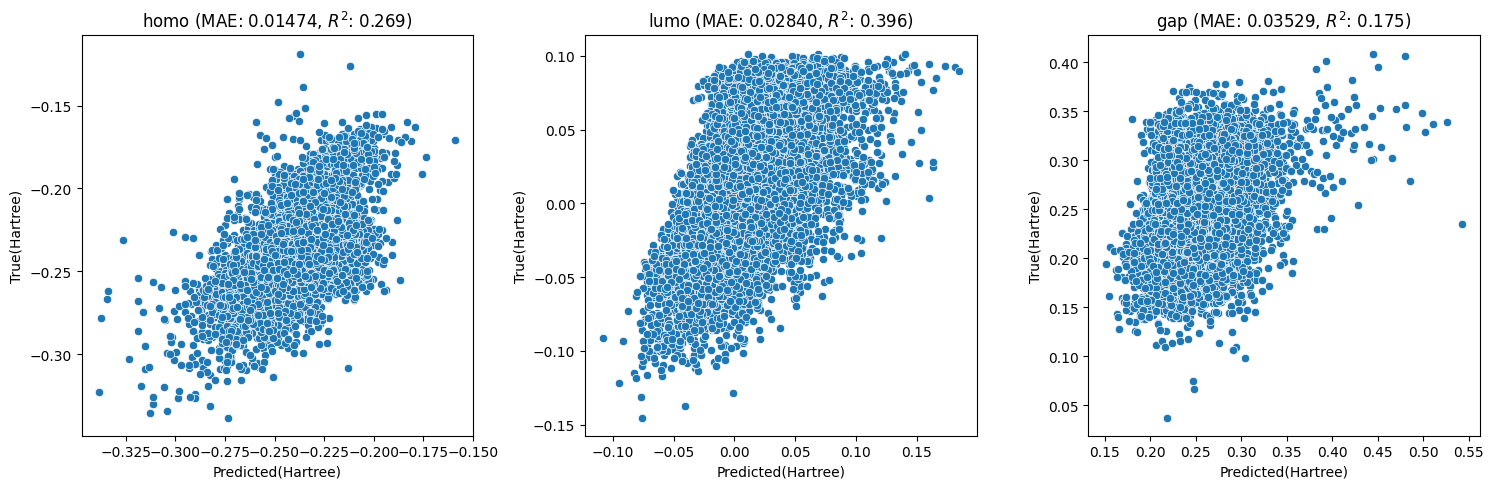

In [29]:


name_list = ["homo", "lumo", "gap"]
str_dataset = "qtaim_full"
best_label_list = results_dict[str_dataset]["test_labels"]
best_preds_test = results_dict[str_dataset]["test_preds"]
# plot each as a subplot of scatter plots
best_label_array = np.array(best_label_list)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    x = best_preds_test[:, i]
    y = best_label_array[:, i]
    mae = np.mean(np.abs(x - y))
    r2 = np.corrcoef(x, y)
    sns.scatterplot(x=x, y=y, ax=ax[i])
    ax[i].set_title(
        "{} (MAE: {:.5f}, $R^2$: {:.3f})".format(
            name_list[i],
            mae,
            r2[1, 0] ** 2,
        )
    )
    ax[i].set_xlabel("Predicted(Hartree)")
    ax[i].set_ylabel("True(Hartree)")
    # ax[i].set_xlim(-10, 10)
    # ax[i].set_ylim(-10, 10)
    # ax[i].plot([-10, 10], [-10, 10], color="black", linestyle="--")
fig.tight_layout()


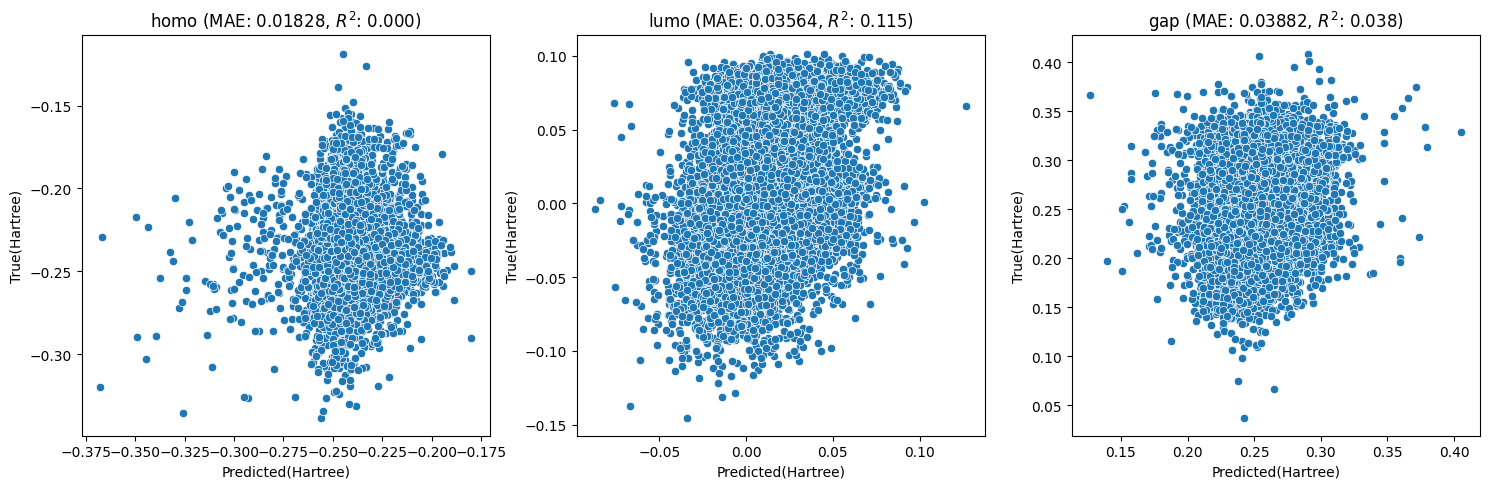

In [30]:

str_dataset = "no_qtaim"
name_list = ["homo", "lumo", "gap"]
best_label_list = results_dict[str_dataset]["test_labels"]
best_preds_test = results_dict[str_dataset]["test_preds"]
# plot each as a subplot of scatter plots
best_label_array = np.array(best_label_list)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    x = best_preds_test[:, i]
    y = best_label_array[:, i]
    mae = np.mean(np.abs(x - y))
    r2 = np.corrcoef(x, y)
    sns.scatterplot(x=x, y=y, ax=ax[i])
    ax[i].set_title(
        "{} (MAE: {:.5f}, $R^2$: {:.3f})".format(
            name_list[i],
            mae,
            r2[1, 0] ** 2,
        )
    )
    ax[i].set_xlabel("Predicted(Hartree)")
    ax[i].set_ylabel("True(Hartree)")
    # ax[i].set_xlim(-10, 10)
    # ax[i].set_ylim(-10, 10)
    # ax[i].plot([-10, 10], [-10, 10], color="black", linestyle="--")
fig.tight_layout()


In [ ]:
model_qtaim = results_dict["qtaim_full"]["model"]
model_no_qtaim = results_dict["no_qtaim"]["model"]

In [3]:
# retrain from scratch - best models above
#model_qtaim = results_dict["qtaim_full"]["model"]
#model_no_qtaim = results_dict["no_qtaim"]["model"]

# retrain from scratch - manual best models for qm9
qtaim_keys_high = {
    "atom": [
        "extra_feat_atom_Lagrangian_K",
        "extra_feat_atom_Hamiltonian_K",
        "extra_feat_atom_e_density",
        "extra_feat_atom_lap_e_density",
        "extra_feat_atom_e_loc_func",
        "extra_feat_atom_ave_loc_ion_E",
        "extra_feat_atom_delta_g_promolecular",
        "extra_feat_atom_delta_g_hirsh",
        "extra_feat_atom_esp_nuc",
        "extra_feat_atom_esp_e",
        "extra_feat_atom_esp_total",
        "extra_feat_atom_grad_norm",
        "extra_feat_atom_lap_norm",
        "extra_feat_atom_eig_hess",
        "extra_feat_atom_det_hessian",
        "extra_feat_atom_ellip_e_dens",
        "extra_feat_atom_eta",
        "extra_feat_atom_density_beta",
        "extra_feat_atom_density_alpha",
        "extra_feat_atom_spin_density",
        "extra_feat_atom_lol",
    ],
    "bond": [
        "extra_feat_bond_Lagrangian_K",
        "extra_feat_bond_Hamiltonian_K",
        "extra_feat_bond_e_density",
        "extra_feat_bond_lap_e_density",
        "extra_feat_bond_e_loc_func",
        "extra_feat_bond_ave_loc_ion_E",
        "extra_feat_bond_delta_g_promolecular",
        "extra_feat_bond_delta_g_hirsh",
        "extra_feat_bond_esp_nuc",
        "extra_feat_bond_esp_e",
        "extra_feat_bond_esp_total",
        "extra_feat_bond_grad_norm",
        "extra_feat_bond_lap_norm",
        "extra_feat_bond_eig_hess",
        "extra_feat_bond_det_hessian",
        "extra_feat_bond_ellip_e_dens",
        "extra_feat_bond_eta",
        "extra_feat_bond_energy_density",
        "extra_feat_bond_density_beta",
        "extra_feat_bond_density_alpha",
        "extra_feat_bond_spin_density",
        "extra_feat_bond_lol",
    ],
    "global": ["homo", "lumo", "gap"],
}




qm9_loc = "../../../../data/splits_1205/test_qm9_1205_large.pkl"
qm9_train_loc = "../../../../data/splits_1205/train_qm9_1205_small.pkl"

base_dict = {
    "atom": [],
    "bond": ["bond_length"],
    "global": ["homo", "lumo", "gap"],
}

dataset_dict = {}
keys_list = [
    base_dict,
    qtaim_keys_high,
]
for ind, feat_dict in enumerate(keys_list):
    if ind == 0:
        key = "base"
    elif ind == 1:
        key = "qtaim_full"

    dataset_dict[key + "_test"] = HeteroGraphGraphLabelDataset(
        file=qm9_loc,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=None,
        allowed_spins=None,
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["homo", "lumo", "gap"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=True,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )
    dataset_dict[key + "_train"] = HeteroGraphGraphLabelDataset(
        file=qm9_train_loc,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=None,
        allowed_spins=None,
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["homo", "lumo", "gap"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=True,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )


qtaim_model_bl_dict = {
    "atom_feature_size": 34,
    "bond_feature_size": 29,
    "global_feature_size": 3,
    "conv_fn": "ResidualBlock",
    "target_dict": {"global": ["homo", "lumo", "gap"]},
    "dropout": 0.2,
    "batch_norm_tf": True,
    "activation": "ReLU",
    "bias": True,
    "norm": "both",
    "aggregate": "sum",
    "n_conv_layers": 6,
    "lr": 0.044675426899321025,
    "weight_decay": 1e-05,
    "lr_plateau_patience": 25,
    "lr_scale_factor": 0.5,
    "scheduler_name": "reduce_on_plateau",
    "loss_fn": "mse",
    "resid_n_graph_convs": 2,
    "embedding_size": 100,
    "fc_layer_size": [512, 512, 512],
    "shape_fc": "flat",
    "fc_dropout": 0.1,
    "fc_batch_norm": True,
    "n_fc_layers": 3,
    "global_pooling_fn": "WeightAndSumThenCat",
    "ntypes_pool": ["atom", "bond", "global"],
    "ntypes_pool_direct_cat": ["global"],
    "lstm_iters": 15,
    "lstm_layers": 2,
    "num_heads": 2,
    "feat_drop": 0.1,
    "attn_drop": 0.1,
    "residual": True,
    "hidden_size": 50,
    "ntasks": 1,
    "num_heads_gat": 2,
    "dropout_feat_gat": 0.1,
    "dropout_attn_gat": 0.1,
    "hidden_size_gat": 50,
    "residual_gat": True,
    "shape_fc": "cone",
    "classifier": False,
    "fc_num_layers": 3,
    "batch_norm": True,
    "pooling_ntypes": ["atom", "bond", "global"],
    "pooling_ntypes_direct": ["global"],
    "fc_hidden_size_1": 1024,
    "fc_num_layers": 3,
    "restore": False,
    "classifier": False,
}


non_qtaim_model_bl_dict = {
    "atom_feature_size": 13,
    "bond_feature_size": 8,
    "global_feature_size": 3,
    "conv_fn": "GraphConvDropoutBatch",
    "target_dict": {"global": ["homo", "lumo", "gap"]},
    "dropout": 0.2,
    "batch_norm_tf": True,
    "activation": "ReLU",
    "bias": True,
    "norm": "both",
    "fc_num_layers": 3,
    "aggregate": "sum",
    "n_conv_layers": 6,
    "lr": 0.01885852849843154,
    "weight_decay": 1e-05,
    "lr_plateau_patience": 25,
    "lr_scale_factor": 0.5,
    "scheduler_name": "reduce_on_plateau",
    "loss_fn": "mse",
    "resid_n_graph_convs": 2,
    "embedding_size": 50,
    "fc_layer_size": [1024, 512, 256],
    "fc_dropout": 0.1,
    "fc_batch_norm": True,
    "n_fc_layers": 3,
    "global_pooling_fn": "SumPoolingThenCat",
    "ntypes_pool": ["atom", "bond", "global"],
    "ntypes_pool_direct_cat": ["global"],
    "lstm_iters": 9,
    "lstm_layers": 2,
    "num_heads": 3,
    "feat_drop": 0.1,
    "attn_drop": 0.1,
    "residual": False,
    "hidden_size": 10,
    "ntasks": 1,
    "shape_fc": "cone",
    "num_heads_gat": 3,
    "dropout_feat_gat": 0.1,
    "dropout_attn_gat": 0.1,
    "hidden_size_gat": 10,
    "residual_gat": False,
    "batch_norm": True,
    "pooling_ntypes": ["atom", "bond", "global"],
    "pooling_ntypes_direct": ["global"],
    "fc_hidden_size_1": 512,
    "restore": False,
    "classifier": False,
}


model_temp_qtaim = load_graph_level_model_from_config(qtaim_model_bl_dict)
model_temp_noqtaim = load_graph_level_model_from_config(non_qtaim_model_bl_dict)



... > creating MoleculeWrapper objects


100%|██████████| 12987/12987 [00:01<00:00, 11675.46it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['homo', 'lumo', 'gap']
... > Building graphs and featurizing


100%|██████████| 12987/12987 [00:23<00:00, 563.35it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 12987/12987 [00:01<00:00, 8002.96it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [0.71383508 0.21102346 0.0432872  0.00615704 0.01613397 0.01505054
 0.00502957 0.00091607 0.35678541 0.24347472 0.00080156 0.05340213
 0.03868337]
std [0.60433261 0.37381706 0.16772185 0.06503712 0.10451274 0.10102338
 0.05882973 0.02518197 0.34642311 0.33088348 0.02355752 0.18483438
 0.15911274]
mean [0.         0.05651257 0.00803968 0.02119932 0.01971483 0.00665366
 0.00132543 0.9020906 ]
std [0.         0.18967831 0.07421622 0.11935173 0.11522416 0.06758473
 0.03028138 0.37186959]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.94376491 2.7069018  4.81978313]
std [0.14167909 0.12229085 0.05816714]
... > Scaling features complete
... > feature mean(s): 
 {'atom': tensor([0.7138, 0.2110, 0.0433, 0.0062, 0.0161, 0.0151, 0.0

100%|██████████| 3921/3921 [00:00<00:00, 13439.51it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['homo', 'lumo', 'gap']
... > Building graphs and featurizing


100%|██████████| 3921/3921 [00:06<00:00, 622.04it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 3921/3921 [00:00<00:00, 32588.59it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [8.62412881e-01 1.57035736e-01 1.01547864e-01 4.83111642e-03
 3.83342007e-02 4.28977960e-02 1.52959126e-02 1.88838427e-04
 1.98091510e-01 2.46906243e-01 1.55162241e-02 9.41202193e-02
 1.38512986e-01]
std [0.54106055 0.30594772 0.24510334 0.05766572 0.15843526 0.16701576
 0.10182511 0.01143928 0.31315543 0.33193324 0.10253913 0.23744589
 0.2771715 ]
mean [0.00000000e+00 1.10810752e-01 5.27101637e-03 4.20316646e-02
 4.67397569e-02 1.66830227e-02 3.58224414e-04 8.28340254e-01]
std [0.         0.25402586 0.06021467 0.16543116 0.17381866 0.10623308
 0.01575354 0.37101615]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.49950409 2.41923174 4.71411617]
std [0.10162387 0.15856284 0.1698348 ]
... > Scaling features complete
... > fe

100%|██████████| 12987/12987 [00:05<00:00, 2294.12it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'extra_feat_atom_lol']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_prom

100%|██████████| 12987/12987 [00:23<00:00, 556.38it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'extra_feat_atom_lol'], 'bond': ['metal bond', 'ring inclusion', 'ring size

100%|██████████| 12987/12987 [00:00<00:00, 33856.67it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 7.13835079e-01  2.11023459e-01  4.32871995e-02  6.15704113e-03
  1.61339728e-02  1.50505450e-02  5.02957151e-03  9.16069066e-04
  3.56785412e-01  2.43474716e-01  8.01560433e-04  5.34021288e-02
  3.86833652e-02  1.14831962e+00  6.27044597e+00 -6.27044597e+00
 -7.55224121e+00  6.93045356e-01  1.39249289e+00  8.31798723e-02
  1.42427249e-01  8.51556124e+00 -3.06066578e+00  8.20619413e+00
  0.00000000e+00 -7.55224121e+00 -7.55224121e+00 -1.92440199e+01
  6.53687488e-04 -7.37212182e-01  2.15286564e+00  2.15286564e+00
  0.00000000e+00  6.88742034e-01]
std [6.04332610e-01 3.73817062e-01 1.67721849e-01 6.50371168e-02
 1.04512740e-01 1.01023383e-01 5.88297266e-02 2.51819679e-02
 3.46423112e-01 3.30883478e-01 2.35575223e-02 1.84834379e-01
 1.59112736e-01 1.29221883e+00 5.01078735e+00 5.010

100%|██████████| 3921/3921 [00:01<00:00, 2933.29it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'H', 'C', 'F', 'O', 'N'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'extra_feat_atom_lol']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_prom

100%|██████████| 3921/3921 [00:06<00:00, 635.47it/s]


included in labels
{'global': ['homo', 'lumo', 'gap']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_H', 'chemical_symbol_C', 'chemical_symbol_F', 'chemical_symbol_O', 'chemical_symbol_N', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'extra_feat_atom_lol'], 'bond': ['metal bond', 'ring inclusion', 'ring size

100%|██████████| 3921/3921 [00:00<00:00, 33671.08it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 8.62412881e-01  1.57035736e-01  1.01547864e-01  4.83111642e-03
  3.83342007e-02  4.28977960e-02  1.52959126e-02  1.88838427e-04
  1.98091510e-01  2.46906243e-01  1.55162241e-02  9.41202193e-02
  1.38512986e-01  1.91670931e+00  8.72581646e+00 -8.72581646e+00
 -1.00524570e+01  6.93064396e-01  1.95867898e+00  7.46066330e-02
  1.18758493e-01  1.05716815e+01 -3.18928923e+00  1.03981478e+01
  0.00000000e+00 -1.00524570e+01 -1.00524570e+01 -2.67933793e+01
  7.16696912e-04 -7.24519796e-01  3.18806468e+00  3.18806468e+00
  0.00000000e+00  6.89992251e-01]
std [5.41060551e-01 3.05947719e-01 2.45103340e-01 5.76657182e-02
 1.58435262e-01 1.67015764e-01 1.01825114e-01 1.14392816e-02
 3.13155434e-01 3.31933237e-01 1.02539133e-01 2.37445887e-01
 2.77171497e-01 1.41429475e+00 4.66643066e+00 4.666

In [9]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping

dataloader_train = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_train"], batch_size=256, shuffle=True, num_workers=0
)
dataloader_test = DataLoaderMoleculeGraphTask(
    dataset_dict["qtaim_full_test"],
    batch_size=len(dataset_dict["qtaim_full_test"].graphs),
    shuffle=False,
    num_workers=0,
)
early_stopping_callback = EarlyStopping(
    monitor="val_mae", min_delta=0.00, patience=100, verbose=False, mode="min"
)

lr_monitor = LearningRateMonitor(logging_interval="step")

trainer = pl.Trainer(
    max_epochs=1000,
    accelerator="gpu",
    gradient_clip_val=100.0,
    devices=1,
    accumulate_grad_batches=1,
    enable_progress_bar=True,
    callbacks=[
        early_stopping_callback,
        lr_monitor,
    ],
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    strategy="auto",
    # default_root_dir=model_save_string,
    default_root_dir="./test/",
    precision="bf16-mixed",
)


trainer.fit(model_temp_qtaim, dataloader_train)
trainer.save_checkpoint(f"./qm9_big_small_retrain_qtaim_manual.ckpt")


Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
You are using a CUDA device ('NVIDIA RTX A5000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

   | Name            | Type                | Params
---------------------------------------------------------
0  | activation      | ReLU                | 0     
1  | embedding       | UnifySize           | 6.6 K 
2  | conv_layers     | ModuleList          | 526 K 
3  | readout         | WeightAndSumThenCat | 202   
4  | loss            | Mod

Training: 0it [00:00, ?it/s]

/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:212: UserWarning: You called `self.log('val_mae', ...)` in your `on_train_epoch_end` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(


Epoch 00027: reducing learning rate of group 0 to 2.2338e-02.
Epoch 00053: reducing learning rate of group 0 to 1.1169e-02.
Epoch 00079: reducing learning rate of group 0 to 5.5844e-03.


In [11]:
(
    preds_test,
    preds_train,
    label_list,
    label_list_train,
    val_results,
) = test_and_predict_v2(dataset_dict["qtaim_full_test"], dataset_dict["qtaim_full_train"], model_temp_qtaim)


----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.9181	 mae: 0.0051	 mse: 0.0082
Performance test set:	 r2: 0.0177	 mae: 0.0164	 mse: 0.0212
----------------------------------------------------------------------------------------------------


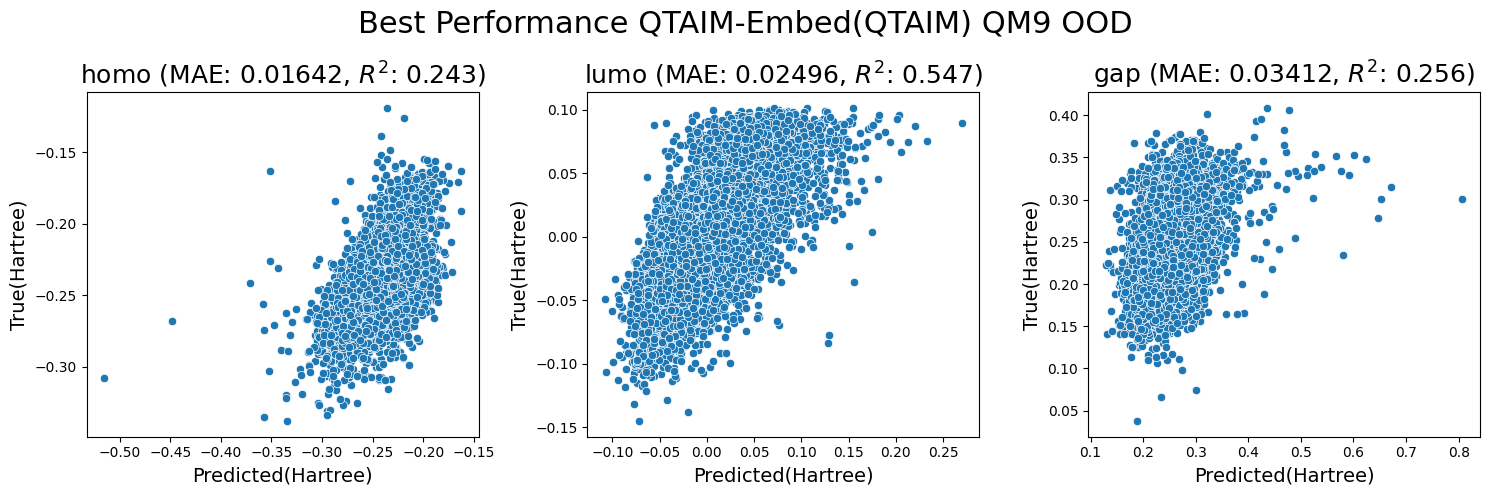

In [16]:

name_list = ["homo", "lumo", "gap"]
str_dataset = "qtaim_full"
best_label_list = label_list
best_preds_test = preds_test
# plot each as a subplot of scatter plots
best_label_array = np.array(best_label_list)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    x = best_preds_test[:, i]
    y = best_label_array[:, i]
    mae = np.mean(np.abs(x - y))
    r2 = np.corrcoef(x, y)
    sns.scatterplot(x=x, y=y, ax=ax[i])
    ax[i].set_title(
        "{} (MAE: {:.5f}, $R^2$: {:.3f})".format(
            name_list[i],
            mae,
            r2[1, 0] ** 2,
        ), fontsize=18
    )
    ax[i].set_xlabel("Predicted(Hartree)", fontsize=14)
    ax[i].set_ylabel("True(Hartree)", fontsize=14)
    # ax[i].set_xlim(-10, 10)
    # ax[i].set_ylim(-10, 10)
    # ax[i].plot([-10, 10], [-10, 10], color="black", linestyle="--")
fig.suptitle("Best Performance QTAIM-Embed(QTAIM) QM9 OOD", fontsize=22)
fig.tight_layout()


In [35]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping

dataloader_train = DataLoaderMoleculeGraphTask(
    dataset_train_qtaim_small, batch_size=256, shuffle=True, num_workers=0
)
dataloader_test = DataLoaderMoleculeGraphTask(
    dataset_test_qtaim_large,
    batch_size=len(dataset_test_qtaim_small.graphs),
    shuffle=False,
    num_workers=0,
)
early_stopping_callback = EarlyStopping(
    monitor="val_mae", min_delta=0.00, patience=25, verbose=False, mode="min"
)

lr_monitor = LearningRateMonitor(logging_interval="step")

trainer = pl.Trainer(
    max_epochs=1000,
    accelerator="gpu",
    gradient_clip_val=100.0,
    devices=1,
    accumulate_grad_batches=5,
    enable_progress_bar=True,
    callbacks=[
        early_stopping_callback,
        lr_monitor,
    ],
    enable_checkpointing=True,
    check_val_every_n_epoch=1,
    strategy="auto",
    # default_root_dir=model_save_string,
    default_root_dir="./test/",
    precision="32",
)


trainer.fit(model_no_qtaim, dataloader_train)
trainer.save_checkpoint(f"./qm9_big_small_retrain_no_qtaim.ckpt")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

   | Name            | Type                          | Params
-------------------------------------------------------------------
0  | activation      | ReLU                          | 0     
1  | embedding       | UnifySize                     | 480   
2  | conv_layers     | ModuleList                    | 21.6 K
3  | readout         | GlobalAttentionPoolingThenCat | 46    
4  | loss            | ModuleList                    | 0     
5  | fc_layers       | ModuleList                    | 574 K 
6  | train_r2        | MultioutputWrapper      

Training: 0it [00:00, ?it/s]

In [26]:
model_no_qtaim = results_dict["no_qtaim"]["model"]

(
    preds_test,
    preds_train,
    label_list,
    label_list_train,
    val_results,
) = test_and_predict_v2(dataset_test_qtaim_small, dataset_train_qtaim_small, model_no_qtaim)


----------------------------------------------------------------------------------------------------
Performance training set:	 r2: -0.2489	 mae: 0.0251	 mse: 0.0318
Performance test set:	 r2: -0.2754	 mae: 0.0181	 mse: 0.0241
----------------------------------------------------------------------------------------------------


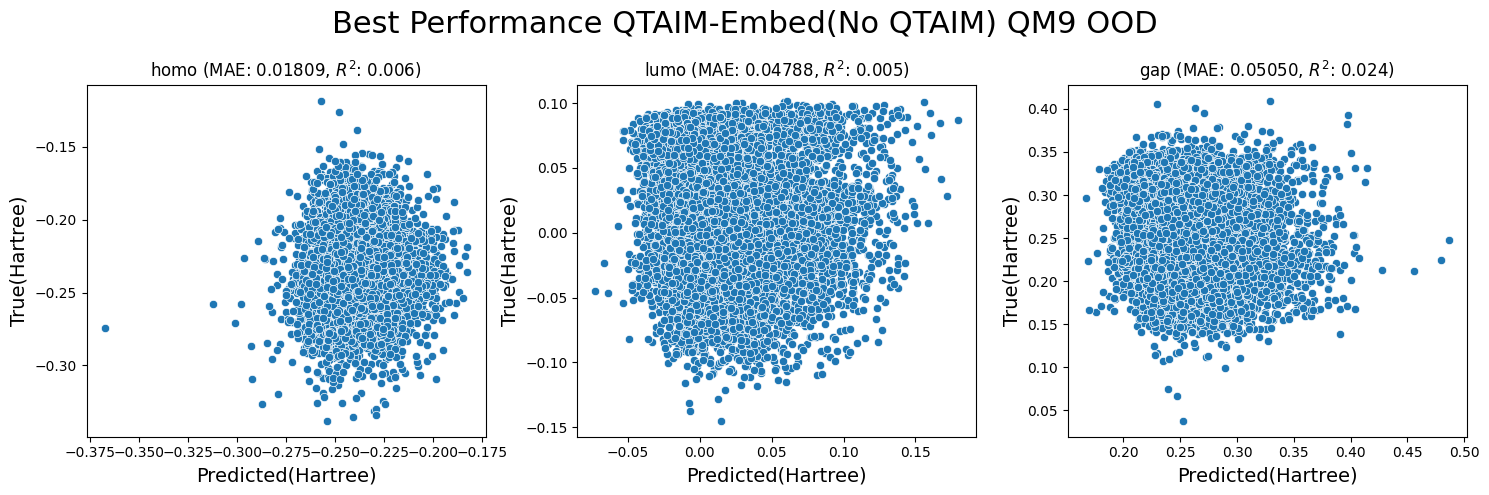

In [30]:
name_list = ["homo", "lumo", "gap"]

best_label_list = label_list
best_preds_test = preds_test
# plot each as a subplot of scatter plots
best_label_array = np.array(best_label_list)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    x = best_preds_test[:, i]
    y = best_label_array[:, i]
    mae = np.mean(np.abs(x - y))
    r2 = np.corrcoef(x, y)
    sns.scatterplot(x=x, y=y, ax=ax[i])
    ax[i].set_title(
        "{} (MAE: {:.5f}, $R^2$: {:.3f})".format(
            name_list[i],
            mae,
            r2[1, 0] ** 2, fontsize=18
        )
    )
    ax[i].set_xlabel("Predicted(Hartree)", fontsize=14)
    ax[i].set_ylabel("True(Hartree)", fontsize=14)
    # ax[i].set_xlim(-10, 10)
    # ax[i].set_ylim(-10, 10)
    # ax[i].plot([-10, 10], [-10, 10], color="black", linestyle="--")
fig.suptitle("Best Performance QTAIM-Embed(No QTAIM) QM9 OOD", fontsize=22)
fig.tight_layout()
